# Fake News Detection

## Importing Libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm

## Dataset

In [28]:
fake = pd.read_csv('news.csv')

In [29]:
fake.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [31]:
fake = fake.drop(['title'], axis=1)

In [32]:
fake.shape

(6335, 3)

In [33]:
fake.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [34]:
fake.head()

,Unnamed: 0,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,It's primary day in New York and front-runners...,REAL


In [35]:
labels = fake.label
body = fake.text

In [36]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
5       FAKE
6       FAKE
7       REAL
8       REAL
9       REAL
10      REAL
11      REAL
12      FAKE
13      FAKE
14      REAL
15      REAL
16      FAKE
17      FAKE
18      REAL
19      REAL
20      REAL
21      FAKE
22      REAL
23      REAL
24      FAKE
25      REAL
26      REAL
27      REAL
28      REAL
29      FAKE
        ... 
6305    FAKE
6306    FAKE
6307    FAKE
6308    FAKE
6309    REAL
6310    REAL
6311    REAL
6312    FAKE
6313    FAKE
6314    FAKE
6315    REAL
6316    REAL
6317    FAKE
6318    FAKE
6319    REAL
6320    FAKE
6321    FAKE
6322    FAKE
6323    REAL
6324    REAL
6325    FAKE
6326    FAKE
6327    REAL
6328    FAKE
6329    FAKE
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

## Spit Dataset

In [37]:
x_train, x_test, y_train, y_test = train_test_split(body, labels, test_size = 0.2, random_state = 20)

## TF-IDF Vectorizer

In [38]:
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [39]:
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

# Models

## Decision Tree

In [40]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(tf_train, y_train)
y_pred_dtc = dtc.predict(tf_test)

## K-Nearest Neighbours

In [41]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(tf_train, y_train)
y_pred_knc = knc.predict(tf_test)

## Logistic regression

In [42]:
lr = LogisticRegression(max_iter=50)
lr.fit(tf_train, y_train)
y_pred_lr = lr.predict(tf_test)

## Naïve Bayes

In [43]:
mnb = MultinomialNB()
mnb.fit(tf_train, y_train)
y_pred_mnb = mnb.predict(tf_test)

## Passive Aggressive Classifier

In [44]:
pac = PassiveAggressiveClassifier(random_state=0)
pac.fit(tf_train, y_train)
y_pred_pac = pac.predict(tf_test)

## Support Vector Machine

In [45]:
clf = svm.SVC(kernel='linear')
clf.fit(tf_train, y_train)
y_pred_clf = clf.predict(tf_test)

## Confusion Matrix

In [46]:
print(f"Decision Tree : \n{confusion_matrix(y_test, y_pred_dtc)}\n")
print(f"K-Nearest Neighbours : \n{confusion_matrix(y_test, y_pred_knc)}\n")
print(f"Logistic regression : \n{confusion_matrix(y_test, y_pred_lr)}\n")
print(f"Naïve Bayes : \n{confusion_matrix(y_test, y_pred_mnb)}\n")
print(f"Passive Agressive Classifier : \n{confusion_matrix(y_test, y_pred_pac)}\n")
print(f"Support Vector Machine : \n{confusion_matrix(y_test, y_pred_clf)}")

Decision Tree : 
[[537 111]
 [ 94 525]]

K-Nearest Neighbours : 
[[551  97]
 [106 513]]

Logistic regression : 
[[619  29]
 [ 69 550]]

Naïve Bayes : 
[[438 210]
 [ 14 605]]

Passive Agressive Classifier : 
[[621  27]
 [ 39 580]]

Support Vector Machine : 
[[627  21]
 [ 50 569]]


## Accuracy

In [47]:
score_dtc = accuracy_score(y_test, y_pred_dtc)
score_knc = accuracy_score(y_test, y_pred_knc)
score_lr = accuracy_score(y_test, y_pred_lr)
score_mnb = accuracy_score(y_test, y_pred_mnb)
score_pac = accuracy_score(y_test, y_pred_pac)
score_clf = accuracy_score(y_test, y_pred_clf)

In [48]:
print(f"Decision Tree Accuracy : {round(score_dtc*100,2)}%")
print(f"K-Nearest Neighbours Accuracy : {round(score_knc*100,2)}%")
print(f"Logistic regression Accuracy : {round(score_lr*100,2)}%")
print(f"Naïve Bayes Accuracy : {round(score_mnb*100,2)}%")
print(f"Passive Agressive Classifier Accuracy : {round(score_pac*100,2)}%")
print(f"Support Vector Machine Accuracy : {round(score_clf*100,2)}%")

Decision Tree Accuracy : 83.82%
K-Nearest Neighbours Accuracy : 83.98%
Logistic regression Accuracy : 92.27%
Naïve Bayes Accuracy : 82.32%
Passive Agressive Classifier Accuracy : 94.79%
Support Vector Machine Accuracy : 94.4%


## ROC Curve

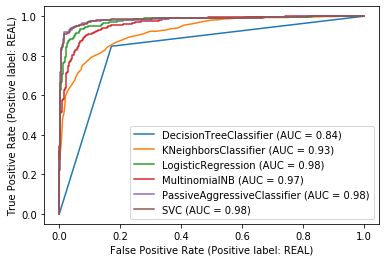

In [49]:
disp = plot_roc_curve(dtc, tf_test, y_test)
plot_roc_curve(knc, tf_test, y_test, ax = disp.ax_);
plot_roc_curve(lr, tf_test, y_test, ax = disp.ax_);
plot_roc_curve(mnb, tf_test, y_test, ax = disp.ax_);
plot_roc_curve(pac, tf_test, y_test, ax = disp.ax_);
plot_roc_curve(clf, tf_test, y_test, ax = disp.ax_);

## Export Vectorizer

In [25]:
import pickle
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))

## Export Model

In [26]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))